In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from matplotlib import pyplot as plt
from scipy import stats

In [3]:
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
df = yfin.download(["^GSPC", "^IXIC", "BTC-USD"], start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,^GSPC,^IXIC
Date,,,
2019-08-01,10399.668945,2953.560059,8111.120117
2019-08-02,10518.174805,2932.050049,8004.069824
2019-08-03,10821.726562,NaN,NaN
2019-08-04,10970.184570,NaN,NaN
2019-08-05,11805.653320,2844.739990,7726.040039


In [5]:
# Remove rows with missing values
df.dropna(inplace = True)

# Calculate log returns
df["SP500"] = np.log(df["^GSPC"]) - np.log(df["^GSPC"].shift(1))
df["NASDAQ"] = np.log(df["^IXIC"]) - np.log(df["^IXIC"].shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))

# Remove original price columns
df.drop(["^GSPC",	"^IXIC", "BTC-USD"], axis = 'columns', inplace = True)

# Remove rows with missing values (again)
df.dropna(inplace = True)

# Display the first five rows
df.head()

Ticker,SP500,NASDAQ,Bitcoin
Date,,,
2019-08-02,-0.007309,-0.013286,0.011331
2019-08-05,-0.030230,-0.035354,0.115474
2019-08-06,0.012933,0.013784,-0.028132
2019-08-07,0.000767,0.003767,0.039612
2019-08-08,0.018588,0.022178,0.002044


In [7]:
df.describe()

Ticker,SP500,NASDAQ,Bitcoin
count,1257.000000,1257.000000,1257.000000
mean,0.000498,0.000616,0.001453
std,0.013458,0.015952,0.041542
min,-0.127652,-0.131492,-0.464730
25%,-0.005256,-0.006802,-0.016203
50%,0.000866,0.001270,0.000365
75%,0.007240,0.009293,0.020095
max,0.089683,0.089347,0.191527


In [9]:
df.std()

Ticker
SP500      0.013458
NASDAQ     0.015952
Bitcoin    0.041542
dtype: float64

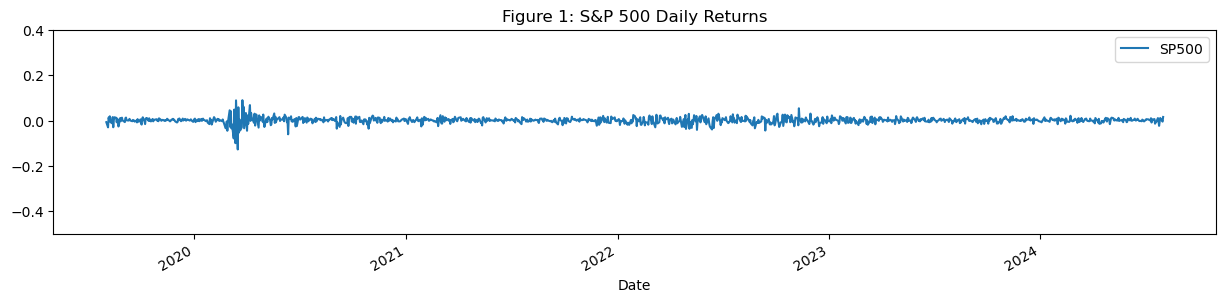

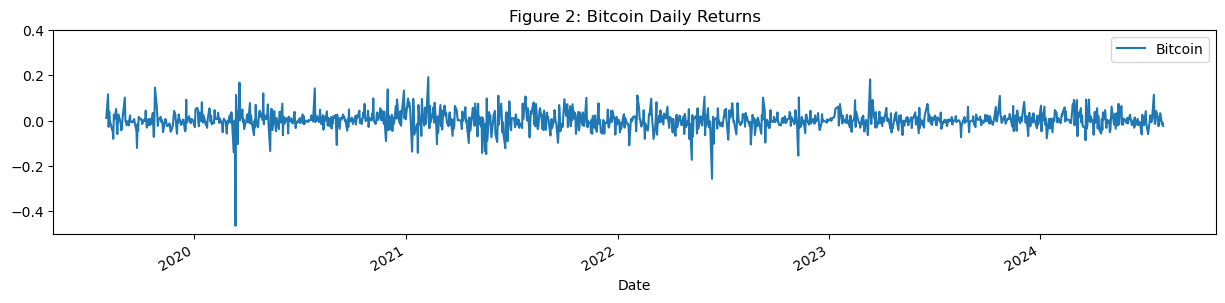

In [11]:
# Generate two plots
ax1 = df.plot(figsize=(15, 3), y="SP500", title="Figure 1: S&P 500 Daily Returns")
ax2 = df.plot(figsize=(15, 3), y="Bitcoin", title="Figure 2: Bitcoin Daily Returns")

# Set y-axis limits for both plots
ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

In [13]:
df.cov()

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,0.000181,0.000203,0.000200
NASDAQ,0.000203,0.000254,0.000253
Bitcoin,0.000200,0.000253,0.001726


In [15]:
round(df.corr(), 3)

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,1.000,0.947,0.358
NASDAQ,0.947,1.000,0.381
Bitcoin,0.358,0.381,1.000


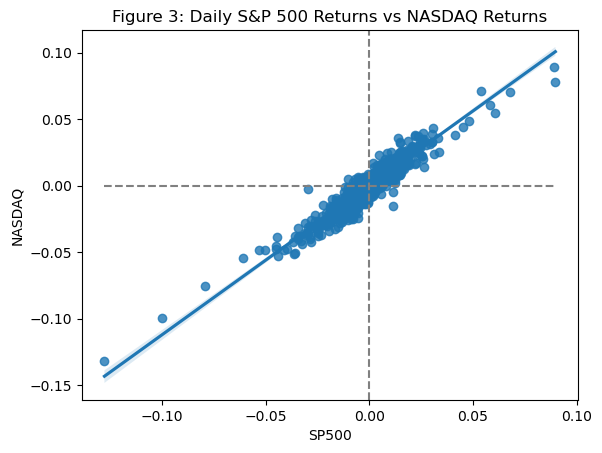

In [17]:
# Create scatter plot with regression line
chart = sns.regplot(x="SP500", y="NASDAQ", data=df).set(
    title="Figure 3: Daily S&P 500 Returns vs NASDAQ Returns"
)

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

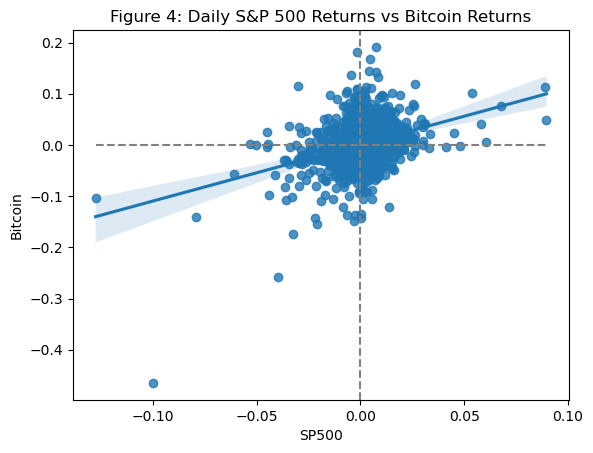

In [19]:
# Create scatter plot with regression line
sns.regplot(x="SP500", y="Bitcoin", data=df).set(
    title="Figure 4: Daily S&P 500 Returns vs Bitcoin Returns"
)

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

In [21]:
# Calculates the Sharpe Ratios for both the S&P 500 and Bitcoin
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()

# Print the results
print("Sharpe Ratio of S&P 500: ", round(Sharpe_Ratio_SP500, 5))
print("Sharpe Ratio of Bitcoin: ", round(Sharpe_Ratio_Bitcoin, 5))

Sharpe Ratio of S&P 500:  0.03699
Sharpe Ratio of Bitcoin:  0.03498


In [23]:
# Calculate the mean return for each
sp500mean = df["SP500"].mean()
BTCmean = df["Bitcoin"].mean()

# Calculate semivariance for each
sp500_semivariance = ((df[df["SP500"] < sp500mean]["SP500"] - sp500mean) ** 2).mean()
BTC_semivariance = ((df[df["Bitcoin"] < BTCmean]["Bitcoin"] - BTCmean) ** 2).mean()

# Print the semivariance results
print("Semivariance of S&P 500: ", round(sp500_semivariance, 5))
print("Semivariance of Bitcoin: ", round(BTC_semivariance, 5))


Semivariance of S&P 500:  0.00021
Semivariance of Bitcoin:  0.00181


In [25]:
# Starting and end dates
start = datetime.date(2004, 8, 1)
end = datetime.date(2024, 8, 1)

# Get the data
prices = pd.DataFrame(yfin.download(["^GSPC"], start, end, auto_adjust = False)["Adj Close"])

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500"})
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]

[*********************100%***********************]  1 of 1 completed


In [27]:
(len(df[df.SP500 > df.SP500.mean()])) / (len(df))

0.5235446056030201

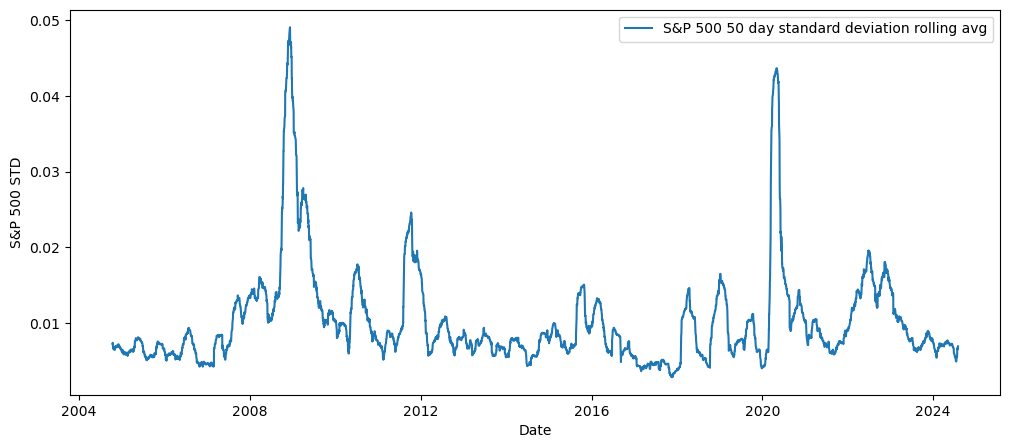

In [29]:
# Calculate rolling standard deviation
vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns={"SP500": "S&P 500 STD"})

# set figure size and plot rolling standard deviations
plt.figure(figsize=(12, 5))
sns.lineplot(
    x="Date",
    y="S&P 500 STD",
    data=vols,
    label="S&P 500 50 day standard deviation rolling avg",
)
plt.show()

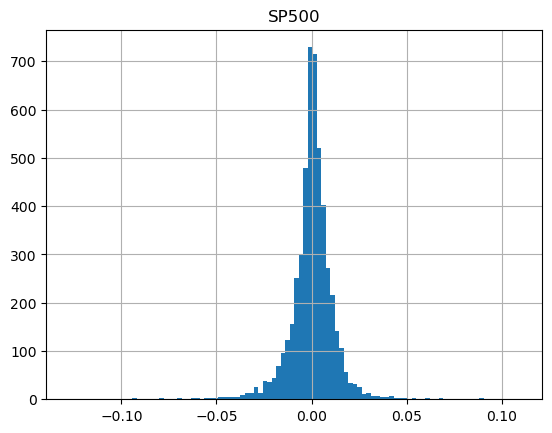

In [31]:
df.hist(bins=100);

In [33]:
stats.normaltest((np.array(df.SP500)))

NormaltestResult(statistic=1234.7310969195057, pvalue=7.612880045350763e-269)

In [35]:
stats.jarque_bera((np.array(df.SP500))).pvalue

0.0

In [37]:
# minimum and maximum daily log returns
dfMax = df.SP500.max()
dfMin = df.SP500.min()

# Print maximum and minimum daily log returns
print("Maximum return of sample data is: ", round(dfMax, 5))
print("Minimum return of sample data is: ", round(dfMin, 5))
print(' - - - - - - - - - -')

# Calculates the number of standard deviations from the mean return
num_dev_max = (df.SP500.max() - df.SP500.mean()) / df.SP500.std()
num_dev_min = (df.SP500.min() - df.SP500.mean()) / df.SP500.std()

# Print num_dev_max and num_dev_min
print("Number of standard deviations from the mean for the maximum return: ", round(num_dev_max, 5))
print("Number of standard deviations from the mean for the minimum return: ", round(num_dev_min, 5))


Maximum return of sample data is:  0.10957
Minimum return of sample data is:  -0.12765
 - - - - - - - - - -
Number of standard deviations from the mean for the maximum return:  9.0497
Number of standard deviations from the mean for the minimum return:  -10.60025


In [39]:
stats.norm.cdf(-10.60)

1.4899011272964664e-26

In [41]:
# Calculates the upper and lowers bounds
upper = (3 * df.SP500.std()) + df.SP500.mean()
lower = (-3 * df.SP500.std()) + df.SP500.mean()

# Print the results
print("Upper bound: ", round(upper, 5))
print("Lower bound: ", round(lower, 5))


Upper bound:  0.03654
Lower bound:  -0.0359


In [43]:
# Calculates the number of data points
len(df[(df["SP500"] < lower) | (df["SP500"] > upper)])

84

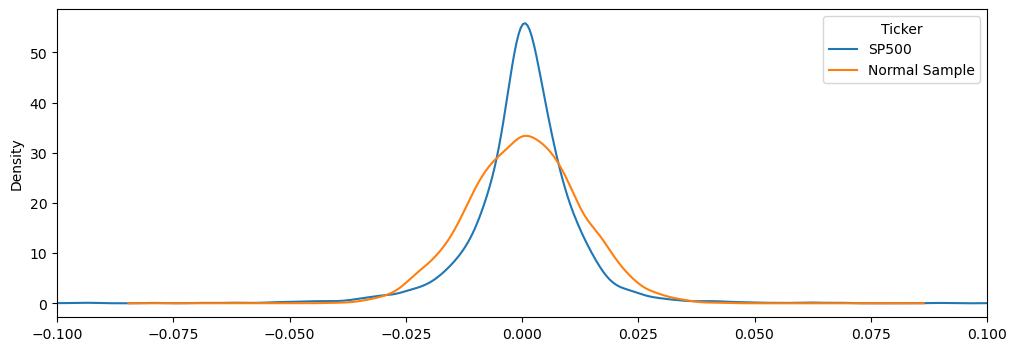

In [45]:
# Sampling from normal distribution
np.random.seed(222)
normal_dist = stats.norm.rvs(size=len(df["SP500"]), loc = df["SP500"].mean(), scale = df["SP500"].std())

# Creating an additional column in df in order to use the KDE plot functionality of pandas
df['Normal Sample'] = normal_dist

# Plotting the KDE plots
df[['SP500', 'Normal Sample']].plot(kind = 'kde', xlim = (-0.1, 0.1), figsize = (12,4));


In [47]:
df.SP500.kurt()

13.180839169084926

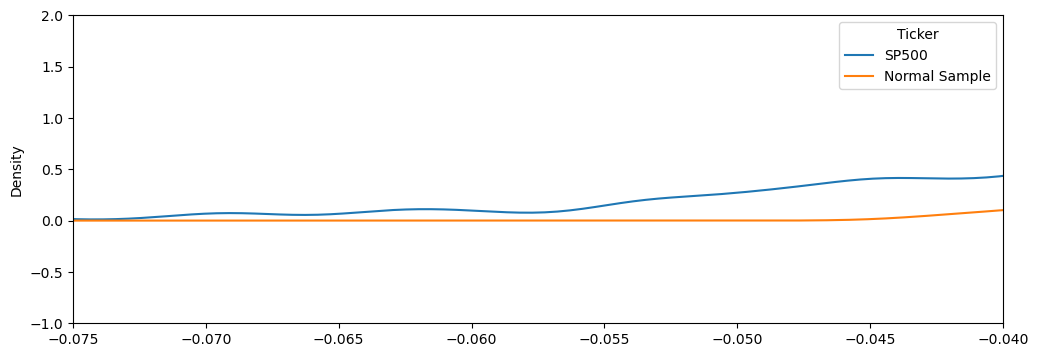

In [49]:
# Observing the tails
df[['SP500', 'Normal Sample']].plot(kind = 'kde', xlim = (-0.075, -0.04), ylim = (-1, 2), figsize = (12,4));

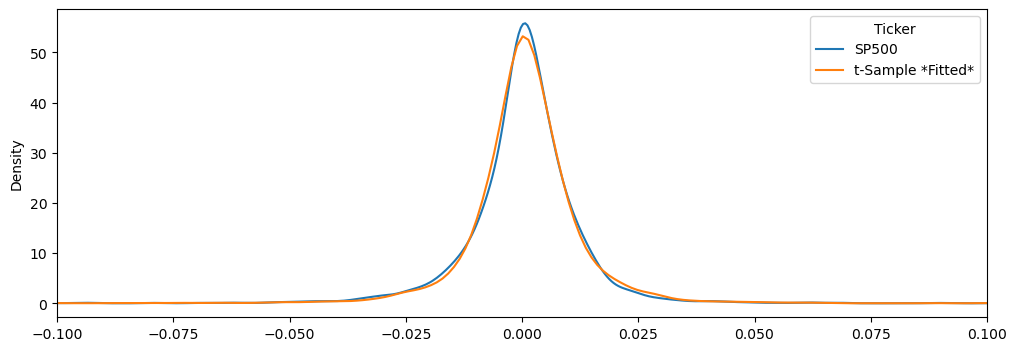

In [51]:
# Fit the t-distribution using MLE
params = stats.t.fit(df.SP500)

# We plot the fitted distribution against the kde of the data
df['t-Sample *Fitted*'] = stats.t.rvs(*params, size = len(df))
df[['SP500', 't-Sample *Fitted*']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.1, 0.1));

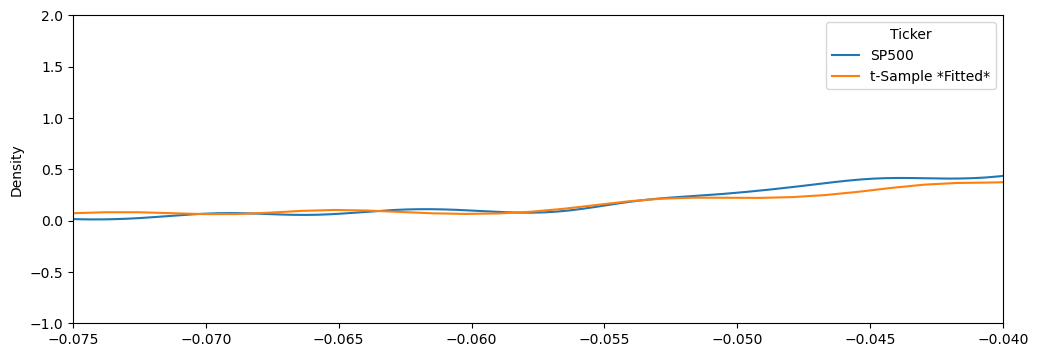

In [53]:
# Plot left tail area
df[['SP500', 't-Sample *Fitted*']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.075, -0.04), ylim = (-1, 2));